Lección 1. Transformación de datos
==================================

**Author:** Marcos Bujosa



<div class="abstract" id="orgeee7641">
<p>
En esta lección veremos algunas transformaciones de los datos para <i>"hacerlos estacionarios"</i>; y daremos interpretación a los datos transformados.
</p>

</div>

-   ([slides](https://mbujosab.github.io/Econometria-Aplicada/Transparencias/Lecc01.slides.html)) &mdash; ([html](https://mbujosab.github.io/Econometria-Aplicada/Lecciones-html/Lecc01.html)) &mdash; ([pdf](https://mbujosab.github.io/Econometria-Aplicada/Lecciones-pdf/Lecc01.pdf)) &mdash; ([mybinder](https://mybinder.org/v2/gh/mbujosab/Econometria-Aplicada/gh-pages?labpath=CuadernosElectronicos/Lecc01.ipynb))



#### Carga de algunos módulos de python y creación de directorios auxiliares



In [1]:
# Para trabajar con los datos y dibujarlos necesitamos cargar algunos módulos de python
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
# definimos parámetros para mejorar los gráficos
mpl.rc('text', usetex=False)
import matplotlib.pyplot as plt   # data visualization

##### Creación del directorio auxiliar para albergar las figuras de la lección



Para publicar la lección como pdf o página web, necesito los gráficos como ficheros `.png` alojados algún directorio específico:



In [2]:
imagenes_leccion = "./img/lecc01" # directorio para las imágenes de la lección
import os
os.makedirs(imagenes_leccion, exist_ok=True) # crea el directorio si no existe

Con el siguiente código mejoro los gráficos y logro transformar las tablas con formato $\LaTeX{}$ en ficheros png.



In [3]:
# definimos parámetros para mejorar los gráficos
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

# transformaré salidas en \LaTeX{} de statsmodels a ficheros png que incluiré en las transparencias
import dataframe_image as dfi
from sympy.printing.preview import preview
def repr_png(tex, ImgFile):
    preamble = "\\documentclass[preview]{standalone}\n" \
        "\\usepackage{booktabs,amsmath,amsfonts}\\begin{document}"    
    preview(tex, filename=ImgFile, viewer='file', preamble=preamble, dvioptions=['-D','250'])

## Procesos estocásticos y datos de series temporales



-   **Proceso estocástico:** es una secuencia de variables aleatorias, $X_t$ donde el índice $t$ recorre el conjunto de números enteros $(\mathbb{Z})$.  
    $$ \boldsymbol{X}\;=\;
      (\ldots,X_{-2},X_{-1},X_0,X_1,\ldots)\;=\; 
      (X_t \mid t\in\mathbb{Z}); $$
-   **Muestra:** es una secuencia *finita* de datos (valores).
    $$ \boldsymbol{x} = (x_1, x_2,\ldots x_n) $$
    -   Consideraremos cada dato $x_t$ como una *realización de* $X_t$.
    -   Consecuentemente, consideraremos que una *muestra* es una *realización de un tramo finito* de un proceso estocástico:
        $$ (x_1, x_2,\ldots x_n) \text{ es una realización de }(X_t \mid t=1:n). $$



Nótese que en el **proceso estocástico** el índice $t$ recorre los infinitos números enteros mientras que en la **muestra** solo recorre los naturales entre $1$ y $n$.



### Datos de sección cruzada vs datos de series temporales



Consideremos dos tipos de muestras $\boldsymbol{x} = (x_1, x_2,\ldots x_n):$

-   **Sección cruzada:** el índice NO es cronológico. La numeración (la indexación) de cada dato es solo una *asignación arbitraria de etiquetas* que identifican a cada individuo, empresa, objeto, etc. que ha sido medido. Consecuentemente:
    -   *el orden en el que aparecen los datos de la muestra es irrelevante*.
    -   conocer el índice de un dato no permite deducir nada respecto de cualquier otro dato de la muestra.



-   **Series temporales:** Corresponden a mediciones de un mismo objeto a lo largo del tiempo. El índice indica el instante de cada medición. *Es habitual que el orden cronológico de los datos sea importante* para explicar cada uno de ellos.
    -   con frecuencia la medición en un instante de tiempo está relacionada con otras mediciones próximas en el tiempo. En tal caso&hellip;
    
    -   no deberemos asumir que las variables aleatorias del proceso estocástico subyacente, $\boldsymbol{X}=(X_t \mid t\in\mathbb{Z})$, sean independientes.



### El desafío



El análisis de *series temporales* trata sobre la inferencia estadística de muestras que **frecuentemente NO podemos asumir que sean realizaciones** de variables aleatorias *i.i.d.* (*independientes e idénticamente distribuidas*).



Así pues, aunque

-   el marco ideal para el análisis es que la serie temporal "**sea estacionaria**" (!!),
    
    (!! *abuso del lenguaje que expresa que podemos asumir que la serie es una <u>realización de un proceso estocástico estacionario</u>, es decir, cuyos momentos no dependen del índice $t$*. Veremos una definición formal en lecciones posteriores).
-   lo habitual es que, por distintos motivos, **NO lo sea**.



In [4]:
path = '../datos/'
df1 = pd.read_csv(path+'PIB_UEM.csv')
df2 = pd.read_csv(path+'ProduccionCemento.csv')
df3 = pd.read_csv(path+'IBEX35.csv')
df4 = pd.read_csv(path+'ExportacionDeAcero.csv')

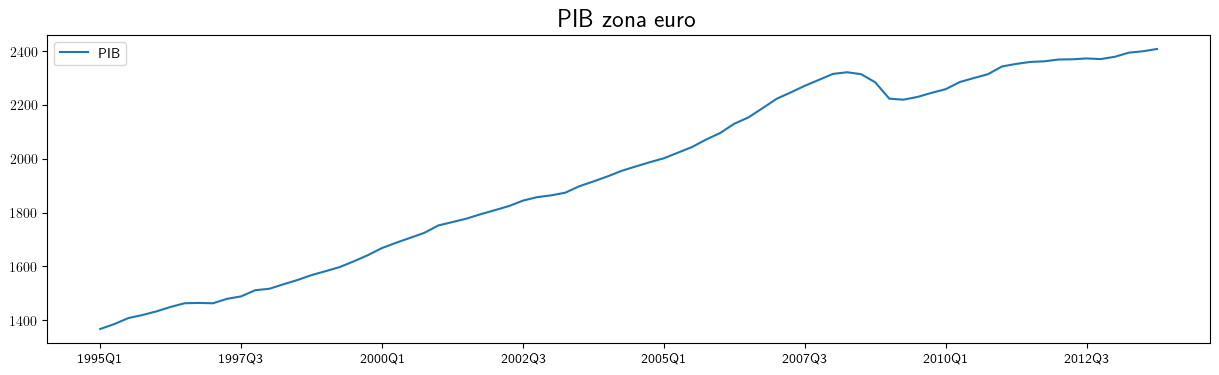

In [5]:
df1.plot(x='obs',xlabel='',figsize=(15,4)).set_title('PIB zona euro',fontsize=18)
plt.savefig('./img/lecc01/PIB_UEM.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/PIB_UEM.png)



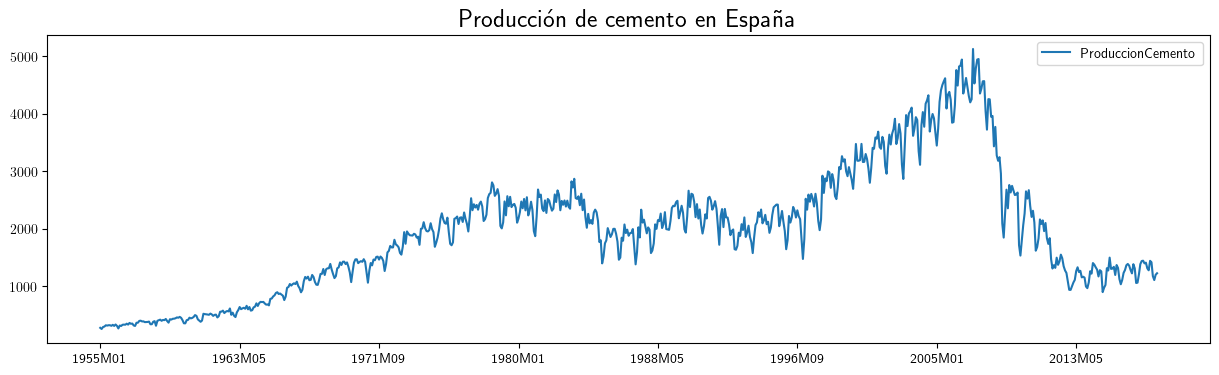

In [6]:
df2.plot(x='obs',xlabel='',figsize=(15,4)).set_title('Producción de cemento en España',fontsize=18)
plt.savefig('./img/lecc01/ProduccionCemento.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/ProduccionCemento.png)



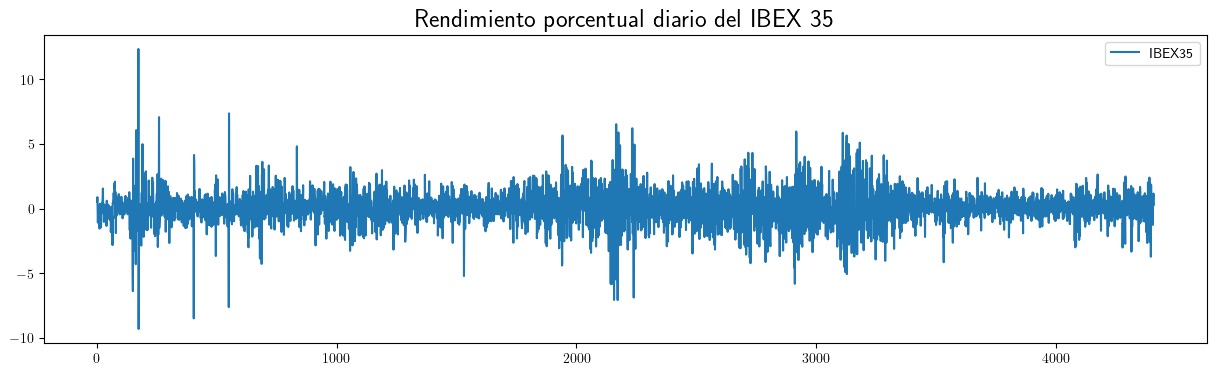

In [7]:
df3.plot(x='obs',xlabel='',figsize=(15,4)).set_title('Rendimiento porcentual diario del IBEX 35',fontsize=18)
plt.savefig('./img/lecc01/IBEX35.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/IBEX35.png)



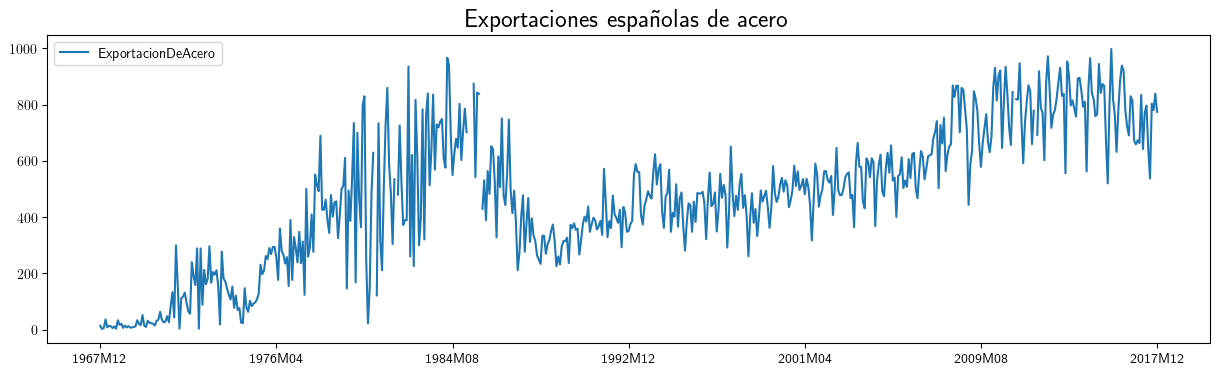

In [8]:
df4.plot(x='obs',xlabel='',figsize=(15,4)).set_title('Exportaciones españolas de acero',fontsize=18)
plt.savefig('./img/lecc01/ExportacionDeAcero.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/ExportacionDeAcero.png)



El desafío para el analista es

-   **primero:** transformar los datos para lograr que sean "***estacionarios***"
-   **y después:** transformar los datos estacionarios en "***ruido blanco***" (!!)
    
    (!! *nuevo abuso del lenguaje que expresa que podemos asumir dichos datos transformados son realizaciones de un proceso de ruido blanco, i.e. de <u>media cero e incorrelado</u>.*)



## Estacionariedad



El primer objetivo del *análisis de series temporales* es inferir la distribución de $\boldsymbol{X}=(X_t \mid t\in\mathbb{Z})$ usando una muestra finita (serie temporal) $\boldsymbol{x}=(x_t \mid t=1:n)$.  

Así podremos intentar

-   **Predecir:** datos futuros
-   **Controlar:** datos futuros

Pero esto es inabordable si la evolución de los datos es inestable en el tiempo.

Por tanto, algún tipo de <u>estabilidad</u> (o <u>estacionariedad</u>) es necesaria.



### Estacionariedad en sentido débil



Un proceso estocástico $\boldsymbol{X}$ se dice **estacionario** (*en sentido débil*) si para todo $t,k\in\mathbb{Z}$

\begin{equation}
\label{org0ad2448}
E(X_t)  = \mu
\end{equation}

\begin{equation}
\label{orgafb28ee}
Cov(X_t,X_{t-k}) = \gamma_k 
\end{equation}

-   ([1](#org0ad2448)) sugiere que las realizaciones de $\boldsymbol{X}$ aparecerán entorno al valor $\mu$.
-   ([2](#orgafb28ee)) entre otras cosas, sugiere que la variabilidad de las realizaciones de $\boldsymbol{X}$ entorno a $\mu$ es constante, ya que para el caso particular $k=0$
    $$ Cov(X_t,X_{t-0})=Var(X_t) = \gamma_0\quad\text{ para todo } t, $$
    
    donde $\gamma_0$ es la varianza común a todas las variables aleatorias del proceso.



Es más, la desigualdad de Chebyshev 
$$ P\left(|X_t-\mu|\geq c\sigma\right)\leq\frac{1}{c^2},\quad\text{ donde } \sigma=\sqrt{\gamma_0} $$
sugiere que para cualquier proceso estacionario (y un $c$ grande), al pintar una realización, tan solo un pequeño porcentaje de los datos caerán fuera de la franja $\left(\mu-c\sigma, \mu+c\sigma\right)$.



In [9]:
# simulamos un proceso ARMA(p,q)
import statsmodels.api as sm
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 450)

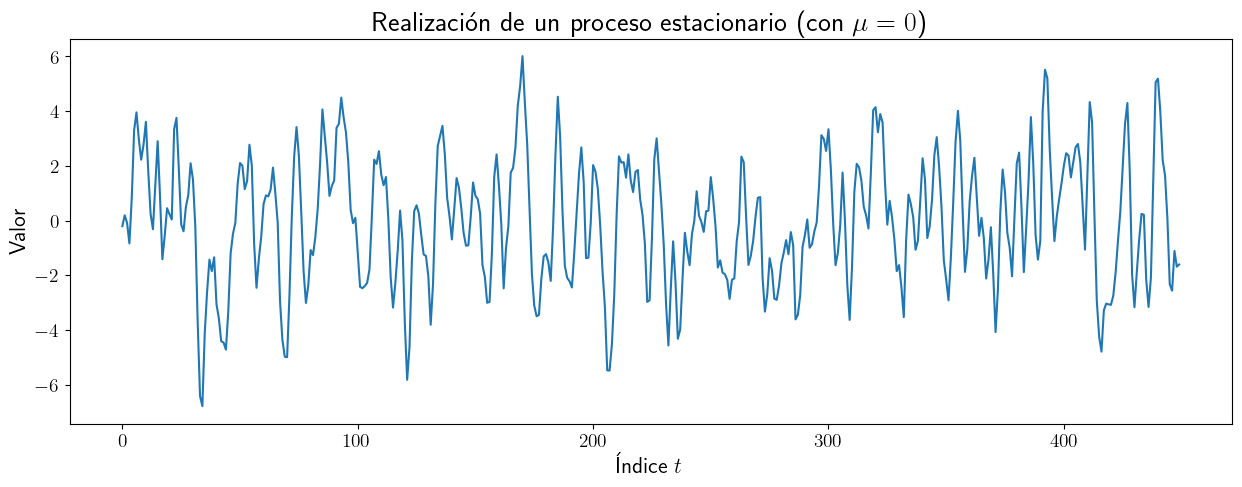

In [10]:
# creamos el gráfico de la serie simulada
plt.figure(figsize=(15,5))
plt.title("Realización de un proceso estacionario (con $\mu=0$)", fontsize=20)
plt.xlabel("Índice $t$", fontsize=16)
plt.ylabel("Valor", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.plot(y)
plt.savefig("./img/lecc01/stationaryTimeSeriesExample.png", dpi=300, bbox_inches='tight')

![img](./img/lecc01/stationaryTimeSeriesExample.png)



### Función de autocovarianzas y función de autocorrelación



Cuando $\boldsymbol{X}$ es un proceso estocástico (débilmente) **estacionario**:

-   La secuencia $\;(\gamma_k \mid k\in\mathbb{Z}),\;$ donde $\;\gamma_k = Cov(X_t,X_{t-k})\;$ se denomina *función de autocovarianzas*.



Debido a la estacionariedad, la correlación entre $X_t$ y $X_{t+k}$ no depende de $t$; tan solo depende de la distancia $k$ entre los índices de ambas variables.

-   La secuencia $\;(\rho_k \mid k\in\mathbb{Z}),\;$ donde
    $\;\rho_k=\frac{Cov(X_t,X_{t-k})}{\sqrt{Var(X_t)Var(X_{t-k})}}=\frac{\gamma_k}{\gamma_0}\;$
    se denomina *función de autocorrelación* (ACF).



(*Estas secuencias serán fundamentales en el análisis de ciertos procesos estocásticos en futuras lecciones*).



## Transformaciones de realizaciones de procesos estocásticos NO estacionarios



Un proceso estocástico $\boldsymbol{X}=(X_t \mid t\in\mathbb{Z})$ puede ser:

-   **NO estacionario en media:** porque $E(X_t)$ depende de $t$.
-   **NO estacionario en covarianza:** porque $Cov(X_t,X_{t-k})$ depende de $t$.

Separar o distinguir ambos tipos de no estacionariedad no es sencillo.



Veamos un ejemplo de serie temporal para la que 

-   no podemos asumir que sea realización de un proceso estocástico *estacionario*;
-   y algunos intentos de transformación para obtener datos "**estacionarios**" (!!).
    
    (!! *recuerde que esta expresión, aunque extendida, es un abuso del lenguaje*).



### Internat. airline passengers: monthly totals in thousands. Jan 49 – Dec 60



In [11]:
# Leemos los datos de un fichero csv y generamos un dataframe de pandas.
OrigData = pd.read_csv('../datos/airline-passengers.csv')
#OrigData = pd.read_csv('../database/Datasets-master/airline-passengers.csv')
OrigData['Month']=pd.to_datetime(OrigData['Month'])
OrigData = OrigData.set_index(['Month'])
# print(OrigData.head())

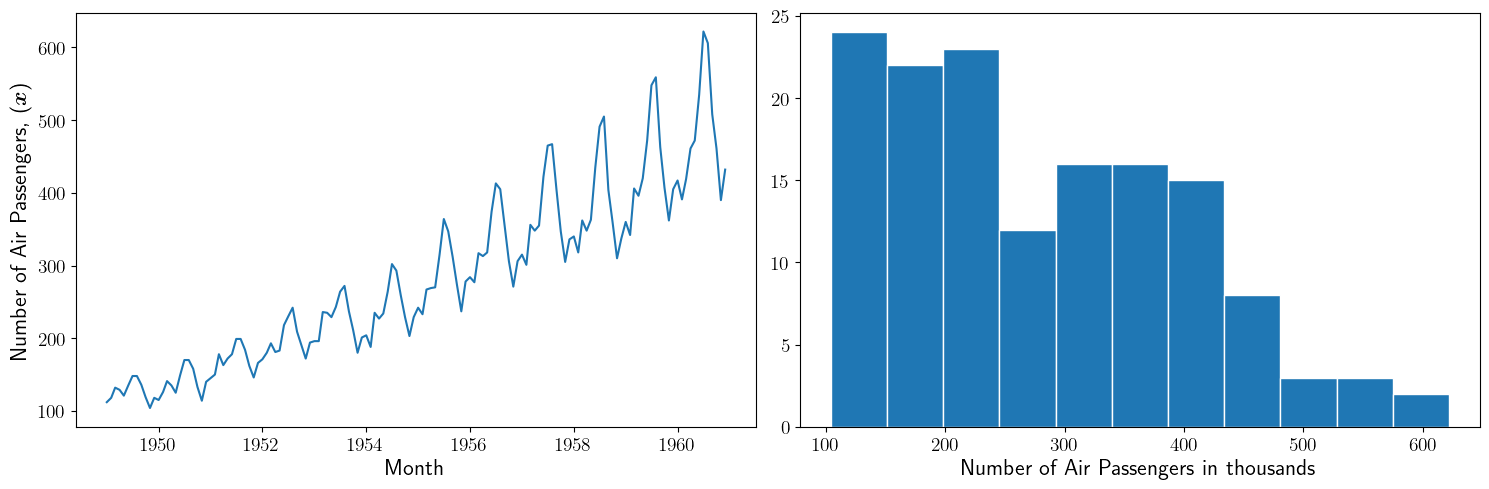

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(OrigData['Passengers'])
plt.xlabel("Month", fontsize=16)
plt.ylabel(r"Number of Air Passengers, ($\boldsymbol{x}$)", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.subplot(1, 2, 2)
plt.hist(OrigData['Passengers'], edgecolor='white', bins=11)
plt.xlabel("Number of Air Passengers in thousands", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('./img/lecc01/airlinepass+hist.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/airlinepass+hist.png)

$$\boldsymbol{x}=(x_1,\ldots x_{114})$$

Serie *"no estacionaria"* (!!):

-   El nivel de la serie crece de año en año.
-   La variabilidad estacional crece con el nivel (creciente diferencia entre el verano y el otoño).



#### Trasformación logarítmica de los datos



-   Al aplicar la función logarítmica transformamos **monótonamente** los datos estabilizando la varianza cuando los valores son mayores que 0.567 (aprox.)
-   Pero ocurre lo contrario cuando los valores son pequeños (aumenta el valor absoluto de aquellos entre 0 y 0.567 aprox.). De hecho, $\lim\limits_{x\to0} \ln(x)=-\infty$.

Recuerde que *el logaritmo no está definido para valores negativos*.



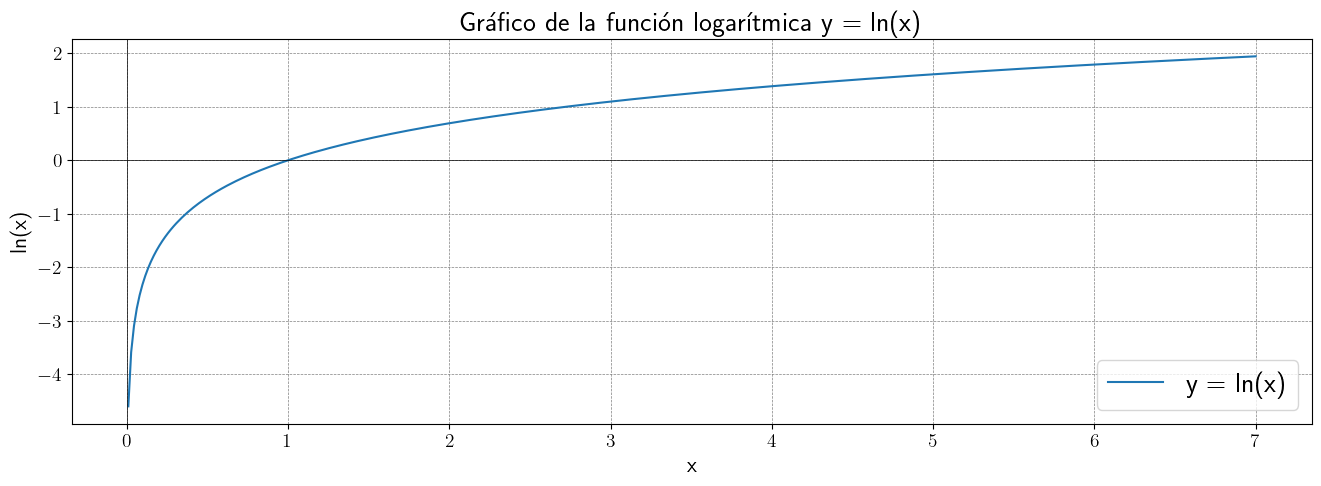

In [13]:
# Definir el rango de valores para x (empezando desde un número positivo ya que log(0) no está definido)
x = np.linspace(0.01, 7, 400)  # Valores de 0.1 a 10
# Calcular y = log(x)
y = np.log(x)

# Crear el gráfico
plt.figure(figsize=(16, 5))
plt.plot(x, y, label='y = ln(x)')
# Añadir etiquetas y título
plt.xlabel('x', fontsize=16)
plt.ylabel('ln(x)', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.title('Gráfico de la función logarítmica y = ln(x)', fontsize=20)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(fontsize=20)
plt.savefig("./img/lecc01/funcion_logaritmica.png", dpi=300, bbox_inches='tight')

![img](./img/lecc01/funcion_logaritmica.png)



In [14]:
# Creamos un nuevo dataframe con los datos originales y varias transformaciones de los mismos
TransformedData = OrigData.copy()
TransformedData['dataLog'] = np.log(OrigData['Passengers'])
TransformedData['dataLogDiff'] = TransformedData['dataLog'].diff(1)
TransformedData['dataLogDiffDiff12'] = TransformedData['dataLogDiff'].diff(12)

#### Transformación logarítmica de los datos



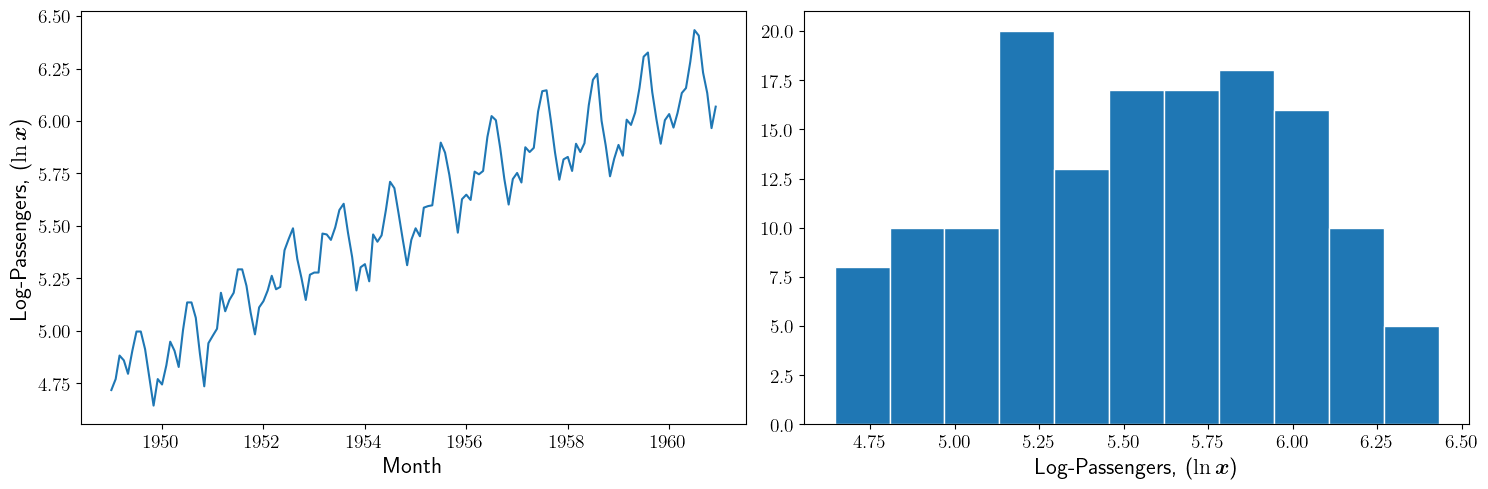

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(TransformedData['dataLog'])
plt.xlabel("Month", fontsize=16)
plt.ylabel(r"Log-Passengers, ($\ln\boldsymbol{x}$)", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.subplot(1, 2, 2)
plt.hist(TransformedData['dataLog'], edgecolor='white', bins=11)
plt.xlabel(r"Log-Passengers, ($\ln\boldsymbol{x}$)", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('./img/lecc01/airlinepass_log+hist.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/airlinepass_log+hist.png)

$$\ln\boldsymbol{x}=\Big(\ln(x_1),\ldots \ln(x_{114})\Big)$$

Ésta tampoco parece la realización de un proceso estocástico *estacionario*:

-   Aunque la variabilidad estacional parece mantenerse de año en año,
-   el nivel sigue creciendo de año en año.



#### Primera diferencia del logarítmo de los datos



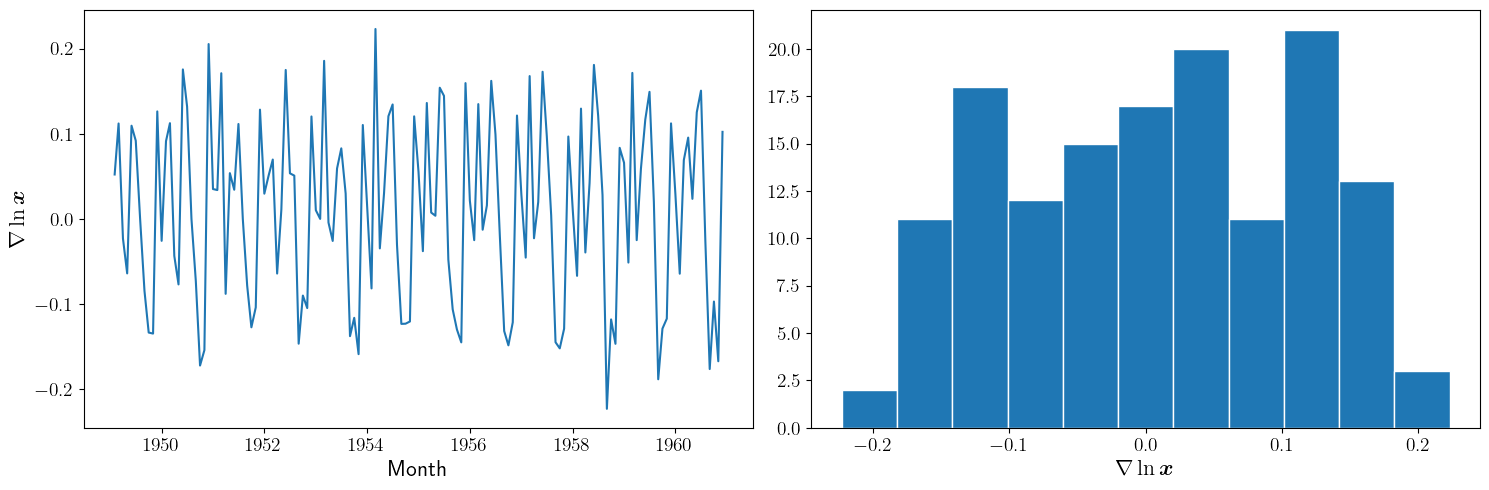

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(TransformedData['dataLogDiff'])
plt.xlabel("Month", fontsize=16)
plt.ylabel(r"$\nabla\ln\boldsymbol{x}$", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.subplot(1, 2, 2)
plt.hist(TransformedData['dataLogDiff'], edgecolor='white', bins=11)
plt.xlabel(r"$\nabla\ln\boldsymbol{x}$", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('./img/lecc01/airlinepass_logDiff+hist.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/airlinepass_logDiff+hist.png)

$$\boldsymbol{y}=\nabla\ln\boldsymbol{x}=\Big(\big[\ln(x_2)-\ln(x_1)\big],\ldots\; \big[\ln(x_{114})-\ln(x_{113})\big]\Big)$$

Esta serie tampoco parece "*estacionaria*" (!!):

-   Hay un *persistente* componente periódico (de naturaleza estacional) debido a que hay pocos viajes en otoño y muchos en Navidad, Semana Santa y verano (i.e., el número esperado de viajeros parece cambiar en función del mes o estación).



#### Diferencia estacional de la primera diferencia del logarítmo de los datos



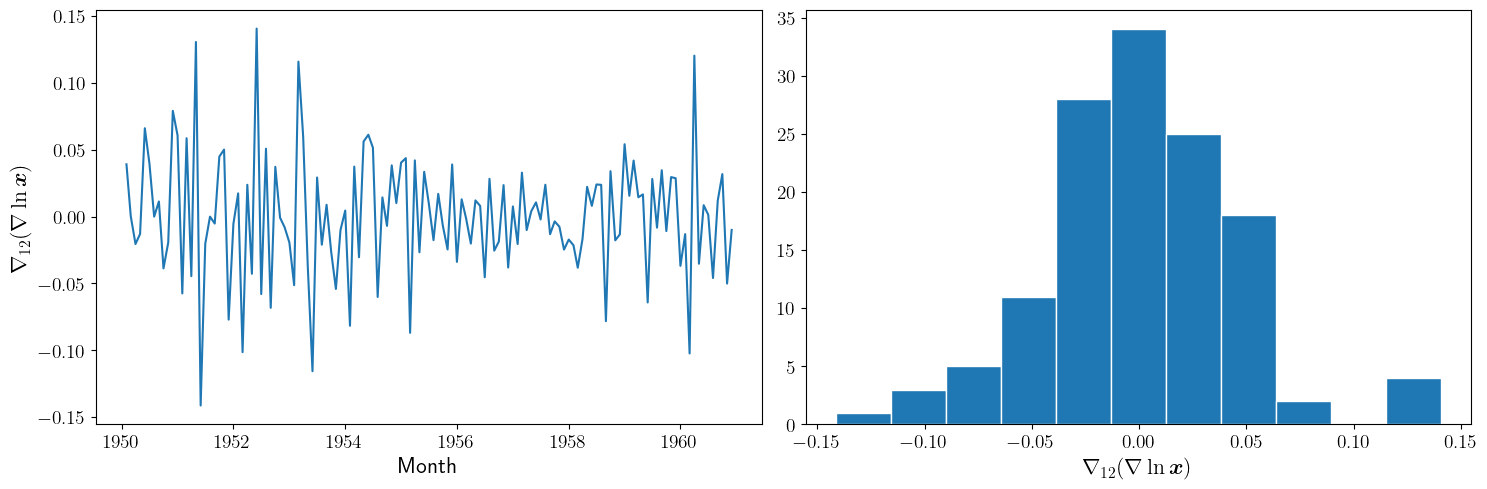

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(TransformedData['dataLogDiffDiff12'])
plt.xlabel("Month", fontsize=16)
plt.ylabel(r"$\nabla_{12}(\nabla\ln\boldsymbol{x})$", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.subplot(1, 2, 2)
plt.hist(TransformedData['dataLogDiffDiff12'], edgecolor='white', bins=11)
plt.xlabel(r"$\nabla_{12}(\nabla\ln\boldsymbol{x})$", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('./img/lecc01/airlinepass_logDiffDiff12+hist.png', dpi=300, bbox_inches='tight')

![img](./img/lecc01/airlinepass_logDiffDiff12+hist.png)

$$\boldsymbol{z}=\nabla_{12}(\nabla\ln\boldsymbol{x})=\nabla_{12}(\boldsymbol{y})=\Big((y_{13}-y_{1}),\ldots\; (y_{113}-y_{101})\Big)$$

-   Esta serie tiene el aspecto de realización de un proceso *estacionario*.

-   De propina, el histograma sugiere una distribución aproximadamente Gaussiana.



### Tasa logarítmica de crecimiento



In [18]:
START = 100
UnoPorCiento = lambda n0, t: n0 if t<=1 else 1.01 * UnoPorCiento(n0, t-1)
TasaLogCrecimiento = pd.DataFrame({'$y_t$':[UnoPorCiento(START,t+1) for t in range(10)]})
TasaLogCrecimiento[r'$\frac{y_t-y_{t-1}}{y_{t-1}}$'] = TasaLogCrecimiento['$y_t$'].pct_change()
TasaLogCrecimiento[r'$\ln y_t$'] = np.log(TasaLogCrecimiento['$y_t$'])
TasaLogCrecimiento[r'$\;(\ln y_t-\ln y_{t-1})$'] = TasaLogCrecimiento[r'$\ln y_t$']-TasaLogCrecimiento[r'$\ln y_t$'].shift(+1)
TasaLogCrecimiento[r'$\frac{y_t-y_{0}}{y_{0}}$'] = TasaLogCrecimiento['$y_t$'].apply(lambda x: ((x/START)-1))
TasaLogCrecimiento[r'$\;(\ln y_t-\ln y_{0})$'] = TasaLogCrecimiento[r'$\ln y_t$']-TasaLogCrecimiento[r'$\ln y_t$'].iloc[0]

La tasa logarítmica de variación de $\boldsymbol{y}$ se define como $z_t=\ln{y_t}-\ln{y_{t-1}};$ es decir
$$ 
\boldsymbol{z}=\nabla\ln\boldsymbol{y} = 
\Big(\big[\ln(y_2)-\ln(y_1)\big],\ldots\; \big[\ln(y_{n})-\ln(y_{n-1})\big]\Big) 
$$
y se *aproxima* a la tasa de crecimiento (en tanto por uno) si el incremento es pequeño.



![img](./img/lecc01/TasaLogCrecimiento.png)



Transformamos la tabla anterior en un fichero `.png` para importarlo en la lección en `.pdf` y como página web.



In [19]:
dfi.export(TasaLogCrecimiento,
           "./img/lecc01/TasaLogCrecimiento.png",
           #use_mathjax=True,
           dpi=300,
           table_conversion="matplotlib")

#### Comentarios y/o interpretaciones de los datos transformados



<style>
.reveal  td {font-size: 90%;}
</style>


| Transformación  de la serie temporal $\displaystyle \boldsymbol{y}=\{y_t\},\; t=1:n$|Comentario y/o interpretación|
|---|---|
| $\boldsymbol{z}=\ln\boldsymbol{y}=\{\ln y_t\}$|A veces independiza la volatilidad del nivel. A veces induce normalidad.|
| $\boldsymbol{z}=\nabla\boldsymbol{y}=\{y_t-y_{t-1}\}$|Indica al crecimiento absoluto entre periodos consecutivos.|
| $\boldsymbol{z}=\nabla\ln\boldsymbol{y}$ $=$ $\{\ln{y_t}-\ln{y_{t-1}}\}$|Tasa logarítmica de crecimiento. Aproximación del crecimiento relativo entre periodos consecutivos.|
| $\boldsymbol{z}=\nabla\nabla\ln\boldsymbol{y}=\nabla^2\ln\boldsymbol{y}$|Cambio en la tasa log. de crecimiento. Indica la “aceleración” en el crecimiento relativo.|
| $\boldsymbol{z}=\nabla_{s}\ln\boldsymbol{y}$ $=$ $\{\ln{y_t}-\ln{y_{t-s}}\}$|Tasa log. de crecimiento acumulada en un ciclo estacional completo ($s$ períodos). Cuando el período estacional es de un año, se conoce como “tasa anual” o “tasa interanual” de crecimiento.|
| $\boldsymbol{z}=\nabla\nabla_{s}\ln\boldsymbol{y}$|Cambio en la tasa log. de crecimiento acumulada en un ciclo estacional completo. Es un indicador de aceleración en el crecimiento acumulado.|

